# 필요라이브러리 임포트

In [1]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import sys
import gensim
from gensim.models import Word2Vec
from konlpy.tag import Okt # 옛날 Twitter 클래스
okt = Okt()
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 한글 처리 코드 

In [2]:
import platform
path = "C:/Users/kccistc/AppData/Local/Microsoft/Windows/Fonts/나눔고딕L.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~')

# Word2Vec 모델 불러오기

In [3]:
# Word2Vec 모델 불러오기
embedding_model = gensim.models.Word2Vec.load('word2VecModel')

# 시각화 함수 정의

In [4]:
def w2vvisualization(keyword):
    while True:
        try: 
            labels = []
            tokens = []
            okt = Okt()

            keyword2 = okt.morphs(keyword, stem=True)
            FirstKeyword = keyword2[0]

            VecWords = embedding_model.most_similar(positive=[FirstKeyword], topn=30)
            tokens = []
            labels = []
            for i in VecWords :
                labels.append(i[0])
                tokens.append(embedding_model[i[0]])

            tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
            new_values = tsne_model.fit_transform(tokens)

            x = []
            y = []

            for value in new_values:
                x.append(value[0])
                y.append(value[1])
            # print(x, y)

            a = pd.DataFrame(labels)
            x = pd.DataFrame(x)
            y = pd.DataFrame(y)

            df = pd.concat([a, x, y], axis = 1)
            df.loc[30] = (keyword, 0, 0)
            df.columns  = ['title', 'x', 'y']
            df

            plt.figure(figsize=(16, 16)) 
            plt.rc("font", size = 20)
            for i in range(len(x)-1):
                # plt.rcParams['font.family'] = 'hanygo250'
                plt.rcParams['axes.unicode_minus'] = False
                a = df.loc[[i, 30], :]
                plt.plot(a.x,a.y, '-D', linewidth = 2)
                plt.annotate(labels[i],
                                    xy=(df.x[i], df.y[i]),
                                    xytext=(5, 2),
                                    textcoords='offset points',
                                    ha='right',
                                    va='bottom')
            
            
            
            # plt.scatter(df.x[30], df.y[30], s = 1000, marker= '*')
            plt.annotate(keyword,
                            xy=(0, 0),
                            xytext=(10, 5),
                            textcoords='offset points',
                            ha='right',
                            va='bottom')


            plt.show()
            break

        except KeyError: 
            print('다시 입력해주세요. 키워드가 존재하지 않습니다. ')
            pass

# 키워드 입력 1 - 시각화
## 쳇번 쨰 키워드에 대한 w2v 의 시각화

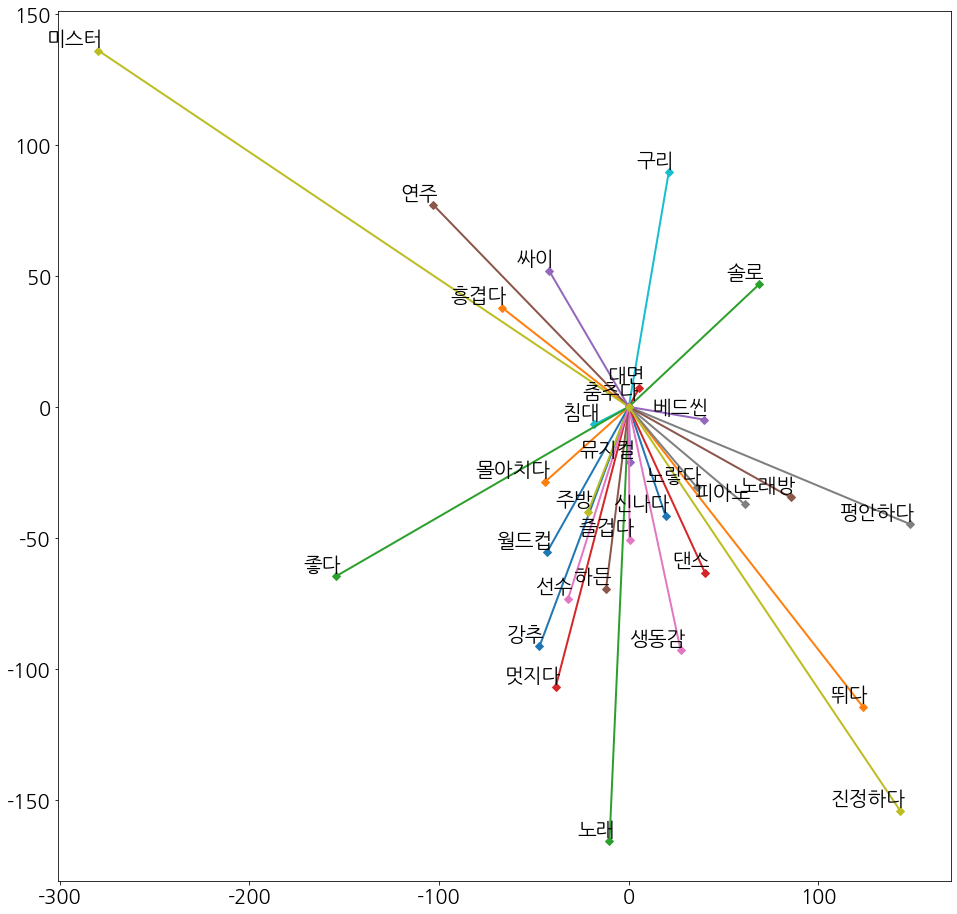

In [5]:
keyword = input("키워드 입력 : ") #로맨틱 #아련한
w2vvisualization(keyword)
keyword = okt.morphs(keyword, stem=True)
FirstKeyword = keyword[0]

# check embedding result
VecWords = embedding_model.most_similar(positive=[FirstKeyword], topn=100)
Veclist1 = []
for i in range(0,31):
    Veclist1.append(VecWords[i][0])
# Veclist1


In [6]:
Veclist1[:10]

['신나다', '흥겹다', '노래', '대면', '뮤지컬', '연주', '즐겁다', '피아노', '미스터', '침대']

# 키워드 입력 2 - 시각화
## 두번 쨰 키워드에 대한 w2v 의 시각화

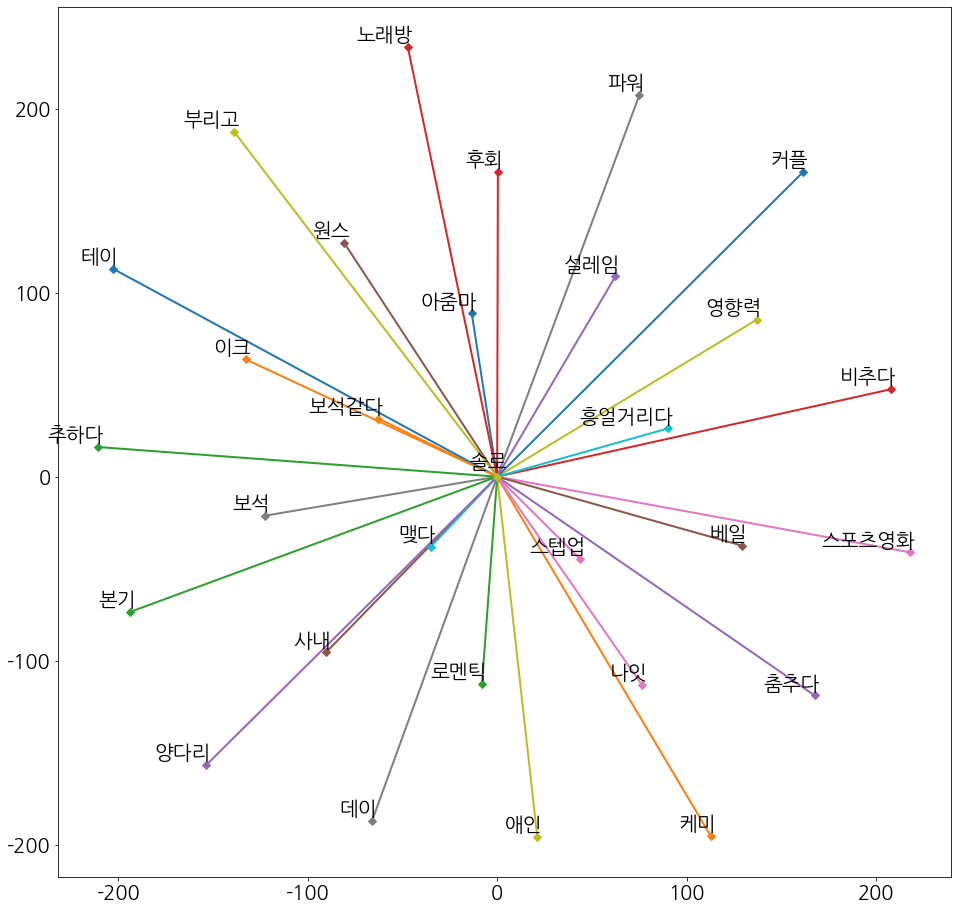

In [7]:
keyword = input("키워드 선택 : ") # 잘생기다 #여운
w2vvisualization(keyword)
# keyword = okt.morphs(keyword)
keyword = okt.morphs(keyword, stem=True)
SecondKeyword = keyword[0]

# check embedding result
VecWords = embedding_model.most_similar(positive=[SecondKeyword], topn=100)
Veclist2 = []
for i in range(0,31):
    Veclist2.append(VecWords[i][0])
# Veclist2

# 키워드 입력 3 - 시각화
## 세번 쨰 키워드에 대한 w2v 의 시각화

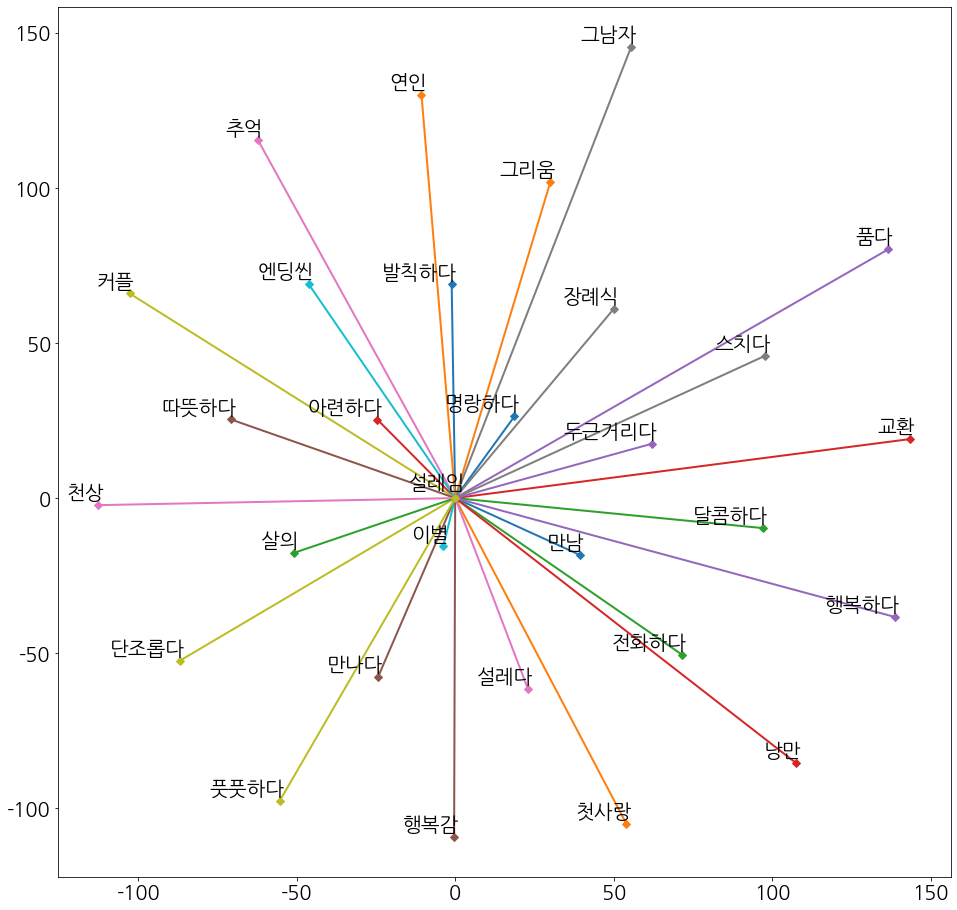

In [8]:
keyword = input("키워드 선택 : ") # 매력 #울림
w2vvisualization(keyword)
keyword = okt.morphs(keyword, stem=True)
ThirdKeyword = keyword[0]

# check embedding result
VecWords = embedding_model.most_similar(positive=[ThirdKeyword], topn=100)
Veclist3 = []
for i in range(0,31):
    Veclist3.append(VecWords[i][0])
# Veclist3

# 키워드에 대한 가중치 설정 

In [9]:
myVec = ([FirstKeyword]+Veclist1[:10])*2 + ([SecondKeyword]+Veclist2[:5])*2 + [ThirdKeyword] + Veclist3[:5]
myVec2 = [FirstKeyword]*3+Veclist1+[SecondKeyword]*2+Veclist2[:5]+[ThirdKeyword] + Veclist3[:5]
len(myVec2)

47

# 리뷰 워드 데이터 불러오기 
<h2>- <영화:리뷰> 리스트의 간결성을 위해 다음영화 리뷰만을 사용 </h2>

In [10]:
# mymyCut.to_csv('리뷰코사인을위한데이터테이블3.csv', encoding='utf-8-sig', index=False)
mymyCut = pd.read_csv("리뷰코사인을위한데이터테이블3.csv")
mymyCut

,영화명,리뷰,word
0,카오산 탱고,카오산 가고싶은 영화옛사랑 떠올리는 영화카오산로드에서 술한잔먹으며 옛사랑 떠올리는 영화,옛사랑 떠올리다 한잔 옛사랑 떠올리다
1,욕창,저는 춤추는 장면이 마음에 남아요,춤추다 마음
2,바다로 가자,아 이런 아픔을 공유한 사람이 나뿐만이 아니구나,아픔
3,국도극장,장면 하나하나가 마치 액자처럼 담백했어요 오씨처럼 살아가면 벌교에선 죽음 마저 평화...,액자 담백하다 살아가다 벌교 죽음 평화롭다
4,국도극장,작품도 배우들 연기도 참 좋다,좋다
...,...,...,...
30553,미트 페어런츠,제시카알바덕에 5점입니다 고갱님,제시카알바 고갱
30554,미트 페어런츠,유쾌하게 볼 수 있는 영화라는데 전적으로 공감,유쾌하다 공감
30555,미트 페어런츠,그냥 웃긴 시트콤 정도네요,웃기다 시트콤
30556,쥬브나일,왠지 일본과 SF영화는 별루 안맞는거 같은데,일본


# 가중치 준 리뷰와 영화 리뷰들의 코사인 유사도

In [11]:
mysent=""
for i in myVec2:
    mysent += "".join(i)
    mysent += " "
mysent

'춤추다 춤추다 춤추다 신나다 흥겹다 노래 대면 뮤지컬 연주 즐겁다 피아노 미스터 침대 강추 뛰다 솔로 멋지다 싸이 하든 생동감 평안하다 주방 구리 월드컵 몰아치다 좋다 댄스 베드씬 노래방 선수 노랗다 진정하다 질린다 놀림 솔로 솔로 아줌마 보석같다 추하다 노래방 춤추다 설레임 만남 첫사랑 달콤하다 아련하다 품다 '

In [12]:
mydf = pd.Series(['입력',mysent,mysent], index=["영화명","리뷰","word"])
mymyCut = mymyCut.append(mydf, ignore_index=True)
mymyCut.iloc[-1,:]

영화명                                                    입력
리뷰      춤추다 춤추다 춤추다 신나다 흥겹다 노래 대면 뮤지컬 연주 즐겁다 피아노 미스터 침...
word    춤추다 춤추다 춤추다 신나다 흥겹다 노래 대면 뮤지컬 연주 즐겁다 피아노 미스터 침...
Name: 30558, dtype: object

# TFIDF구하기

In [13]:
# TFIDF구하기
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf = TfidfVectorizer() 
Tfidf_matrix = Tfidf.fit_transform(mymyCut['word'])

In [14]:
print(Tfidf_matrix.shape) # shape 확인

(30559, 13469)


In [15]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(Tfidf_matrix, Tfidf_matrix)

In [16]:
# 제목별 인덱스숫자 테이블 만들기
# indices = pd.Series(data.index, index=mymyCut['리뷰']).drop_duplicates()
# 추천 함수 생성
def getRecommendation1(cosine_sim= cosine_sim):
    # idx = indices[title]
    simScores = list(enumerate(cosine_sim[-1])) #코사인유사도
    # simScores : 튜플 (인덱스,코사인유사도)
    simScores = sorted(simScores, key=lambda x: x[1] ,reverse=True)
    # 코사인유사도 기준 내림차순 정렬된 튜플중 자기 제외하고 20개 뽑음
    simScores = simScores[1:21]
    # 상위 20개 영화의 인덱스값 저장
    movieidx = [i[0] for i in simScores]
    RecMovielist = mymyCut.iloc[movieidx] 
    return RecMovielist[['영화명','리뷰']]

# 리뷰 키워드 기반 영화 추천 성능확인

In [17]:
getRecommendation1()

,영화명,리뷰
6574,런던 프라이드,춤추고 노래하고 연대하라
1,욕창,저는 춤추는 장면이 마음에 남아요
24592,헤어스프레이,노래하고 춤추는데 보는 난 왜 그렇게 지루했을까
4195,한 솔로: 스타워즈 스토리,한 솔로를 위해 이정도면 충분하다
18137,해피 피트 2,랩하고 춤추는 펭귄영상은 생동감 넘치나 단순한 내용에 산만한 전개가 매 아쉽
25766,해피 피트,랩하고 춤추는 펭귄영상은 생동감 넘치나 단순한 내용에 산만한 전개가 매 아쉽
2938,극장판 짱구는 못말려: 아뵤! 쿵후 보이즈 ~라면 대란~,막판에 다같이 춤추는 앤딩이 너무 어설프다
9875,맨 프롬 UNCLE,나폴레옹 솔로는 왜 안나와
15074,카라스: 프로퍼시,카라스 변신은 아저씨들도 춤추게 한다
17607,레이드 : 첫번째 습격,무술하는건지 춤추는건지 모르겠다


# 리스트에서 선택한 영화를 기준으로 유사한 영화를 추천

In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import wordcloud
%matplotlib inline
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import re
import collections
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

# 딕셔너리형으로 저장된 리뷰 데이터 불러오기<br>
<h2>- 다음영화 / 네이버영화 / 왓챠피디아 / 블로그 총 4개 플랫폼 리뷰 전체 사용</h2>

In [19]:
# load
with open('movie_dict.pickle', 'rb') as f:
    movie_dict = pickle.load(f)

# 딕셔너리를 데이터 프레임화 하기

In [20]:
# 딕셔너리를 데이터 프레임화 하기
df = pd.DataFrame(list(movie_dict.items()),columns = ['title','review'])  
df

,title,review
0,카오산 탱고,전주 국제 영제 과거 따라가다 남자 실 마주 하다 펼쳐지다 진정하다 여 영상 음악 ...
1,욕창,한국 가족제도 전 딜레마 빠지다 노년 나날 깊다 생생하다 다루다 우리 모두 가지 있...
2,바다로 가자,우린 여기 태어나다 아버지 그립다 있다 갈다 없다 모르다 바닷가 바다 건너다 갈수 ...
3,국도극장,서울 젠겨 고이 주다 막연하다 위로 있다 외로워 중국집 시퀀스 웃기다 진지하다 내용...
4,레미: 집 없는 아이,광하다 초록 자연 펼쳐지다 가슴 상쾌하다 기분 거기 프랑스 시골 소년 레미 순수하다...
...,...,...
7628,미트 페어런츠,이상하다 되다 없다 최근 장인 사람 만날 완전하다 꼬이다 버리다 드니 이다 게이 로...
7629,쥬브나일,토리 싱고 연기 좋다 어린이 영 위 제대로 녹다 들다 있다 특출하다 유치하다 않다 ...
7630,게임오버,나이 보지 않다 영원하다 영 이다 인생 최초 안경 보다
7631,이유없는 반항,우울하다 사춘기 격정 보여주다 고등학생 자동차 문 가정 비치 되다 권총 조금 극단 ...


# tf-idf 행렬만들기 - 코사인 유사도 만들기

In [21]:
# tf-idf 행렬만들기
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.review)

In [22]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [23]:
indices = pd.Series(df.index, index = df.title) # 영화 제목으로 인덱스만들기
print(indices) 

title
카오산 탱고            0
욕창                1
바다로 가자            2
국도극장              3
레미: 집 없는 아이       4
               ... 
미트 페어런츠        7628
쥬브나일           7629
게임오버           7630
이유없는 반항        7631
천사의 시          7632
Length: 7633, dtype: int64


# 코사인 유사도 추천시스템 함수 정의

In [24]:
def movie_Recommendation(title, cosine_sim=cosine_sim):
    
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구하기
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse = True) # score 순으로 정렬

    sim_scores = sim_scores[1:11] # 가장 유사한 10개의 영화를 받아옴
    movie_indices = [i[0] for i in sim_scores] # 인덱스 받아오기
    
    result_df = df.iloc[movie_indices].copy()  #기존에 읽어들인 데이터에서 해당 인덱스의 값을 가져오기 스코어 열을 추가
    result_df['score'] = [i[1] for i in sim_scores]
    
    # 가장 유사한 10개의 영화의 제목을 리턴
    return result_df


# 코사인 유사도기반 영화추천 & 워드 클라우드 시각화 

In [25]:
import stylecloud
x = "C:\\Users\\kccistc\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMHANNAPro.ttf"

In [28]:

def creatplot(a):
    reclist = movie_Recommendation(a)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = reclist, y = 'title', x ='score', palette= "BuGn_r")
    plt.show()


    indexmorphs =  df.loc[df['title'] == a].index[0]
    morphs = df['review'][indexmorphs]
    morphs = re.sub('[^가-힣\s]*', '',str(morphs)).split(" ") # 형태소 분류
    textdict = collections.Counter(morphs) # 비율 dict 표현
    textdict[a] = max(textdict.values())*3 # 제목 비중 높이기
    #     # stylecloud 저장
    # stylecloud.gen_stylecloud(text = textdict, icon_name="fas fa-cloud", palette="colorbrewer.diverging.Spectral_11",gradient='vertical', background_color='black',output_name="ttt.png", font_path=x)


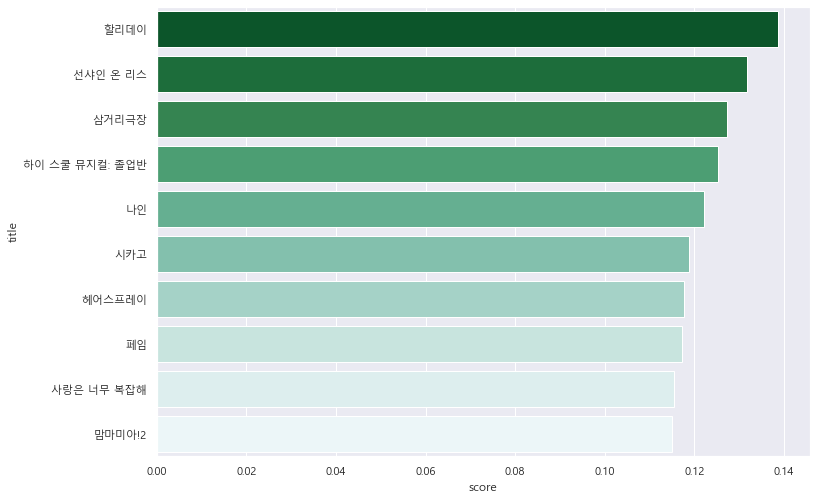

In [29]:
a = input("영화를 입력하세요 : ")
creatplot(a)